# Importing Libraries and Data

In [4]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [9]:
#import pickle file

path =  r'/Users/isomwinton/Desktop/Desktop - Isom’s MacBook Pro/Career Foundry/Data Immersion/Achievement 6/USA Real Estate Analysis 03-2024'
usa = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'real_estate_cleaned_3-13-2024.pkl'))

In [10]:
usa.head(5)

status  bed  bath  acre_lot           city        state zip_code  \
0  for_sale  3.0   2.0      0.12       Adjuntas  Puerto Rico    00601   
1  for_sale  4.0   2.0      0.08       Adjuntas  Puerto Rico    00601   
2  for_sale  2.0   1.0      0.15     Juana Diaz  Puerto Rico    00795   
3  for_sale  4.0   2.0      0.10          Ponce  Puerto Rico    00731   
5  for_sale  4.0   3.0      0.46  San Sebastian  Puerto Rico    00612   

   house_size prev_sold_date     price      price_category  
0       920.0            NaT  105000.0          Affordable  
1      1527.0            NaT   80000.0  Low-end Affordable  
2       748.0            NaT   67000.0  Low-end Affordable  
3      1800.0            NaT  145000.0          Affordable  
5      2520.0            NaT  179000.0          Affordable

# Subsetting, Wrangling, and Cleaning For Time Series Analysis


In [11]:
usa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93047 entries, 0 to 2001632
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status          93047 non-null  category      
 1   bed             93047 non-null  float64       
 2   bath            93047 non-null  float64       
 3   acre_lot        93047 non-null  float64       
 4   city            93046 non-null  object        
 5   state           93047 non-null  object        
 6   zip_code        93047 non-null  object        
 7   house_size      93047 non-null  float64       
 8   prev_sold_date  58428 non-null  datetime64[ns]
 9   price           93047 non-null  float64       
 10  price_category  93047 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(5), object(4)
memory usage: 7.9+ MB


In [12]:
# Set the "prev_sold_date" column as the index

from datetime import datetime

usa['datetime'] = pd.to_datetime(usa['prev_sold_date']) # Create a datetime column from "Date.""
usa = usa.set_index('datetime') # Set the datetime as the index of the dataframe.
usa.drop(['prev_sold_date'], axis=1, inplace=True) # Drop the "Date" column.
usa.head()

status  bed  bath  acre_lot           city        state zip_code  \
datetime                                                                       
NaT       for_sale  3.0   2.0      0.12       Adjuntas  Puerto Rico    00601   
NaT       for_sale  4.0   2.0      0.08       Adjuntas  Puerto Rico    00601   
NaT       for_sale  2.0   1.0      0.15     Juana Diaz  Puerto Rico    00795   
NaT       for_sale  4.0   2.0      0.10          Ponce  Puerto Rico    00731   
NaT       for_sale  4.0   3.0      0.46  San Sebastian  Puerto Rico    00612   

          house_size     price      price_category  
datetime                                            
NaT            920.0  105000.0          Affordable  
NaT           1527.0   80000.0  Low-end Affordable  
NaT            748.0   67000.0  Low-end Affordable  
NaT           1800.0  145000.0          Affordable  
NaT           2520.0  179000.0          Affordable

In [13]:
# Filter out rows where the index ('datetime') is NaT (not a time)
# Create a new DataFrame excluding rows where the index has NaT
cleaned_usa = usa[usa.index.notnull()]


In [14]:
cleaned_usa.head(5)

status  bed  bath  acre_lot          city           state  \
datetime                                                                  
2019-06-28  for_sale  7.0   3.0      0.09        Dorado     Puerto Rico   
2013-10-11  for_sale  5.0   4.0      0.99  Saint Thomas  Virgin Islands   
2014-06-25  for_sale  3.0   3.0      0.45        Agawam   Massachusetts   
2012-10-12  for_sale  3.0   2.0      0.36        Agawam   Massachusetts   
1986-11-20  for_sale  3.0   2.0      0.46        Agawam   Massachusetts   

           zip_code  house_size     price     price_category  
datetime                                                      
2019-06-28    00949      1192.0  110000.0         Affordable  
2013-10-11    00802      5000.0  950000.0             Luxury  
2014-06-25    01001      2314.0  525000.0   Upper Affordable  
2012-10-12    01001      1276.0  289900.0  Middle Affordable  
1986-11-20    01001      1476.0  384900.0  Middle Affordable

In [15]:
# Create a new DataFrame with only the index and 'price' variable
state_price_data = cleaned_usa[['state', 'price']].copy()

In [16]:
# Filter the data so it excluded dates before 1960
state_price_data = state_price_data[state_price_data.index.year >= 1960]


In [17]:
# Create a new DataFrame that groups the data by month/year and state, and calculates the average price
grouped_state_price_data = state_price_data.groupby([state_price_data.index.to_period('M'), 'state']).mean()

In [18]:
# Convert the multi-index to a DataFrame for easier plotting
grouped_state_price_data_reset = grouped_state_price_data.reset_index()
grouped_state_price_data_reset['year'] = grouped_state_price_data_reset['datetime'].dt.year
annual_state_price_data = grouped_state_price_data_reset.groupby(['year', 'state']).mean()

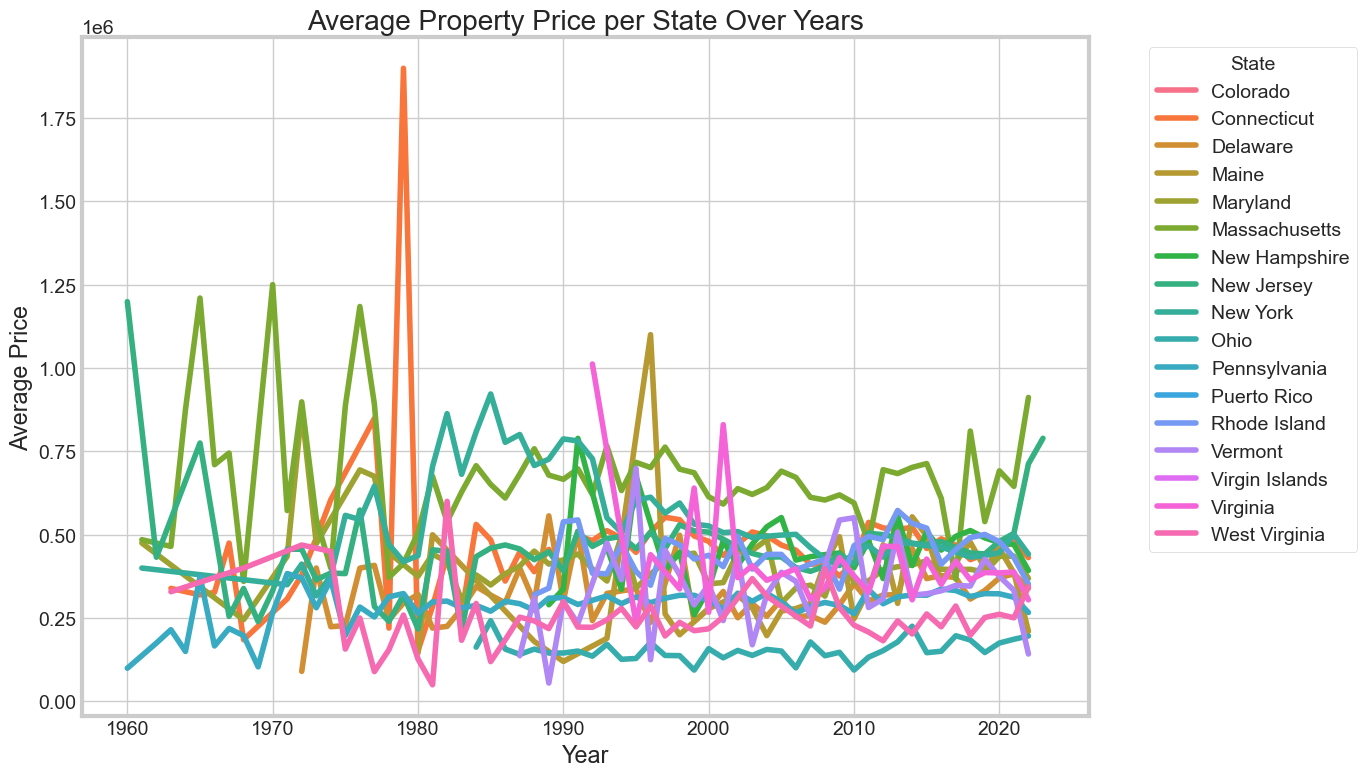

In [19]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Pivot data for plotting
pivot_data = annual_state_price_data.reset_index().pivot(index='year', columns='state', values='price')

# Plot data
plt.figure(figsize=(14, 8)) 
sns.lineplot(data=pivot_data, dashes=False)  # 'dashes=False' makes all lines solid

plt.title('Average Property Price per State Over Years')
plt.ylabel('Average Price')
plt.xlabel('Year')
# Optionally set the x-axis limits if you want to zoom into specific years
# plt.xlim(1960, 2020)

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside of the plot
plt.tight_layout()  # Adjusts plot parameters for better layout
plt.show()


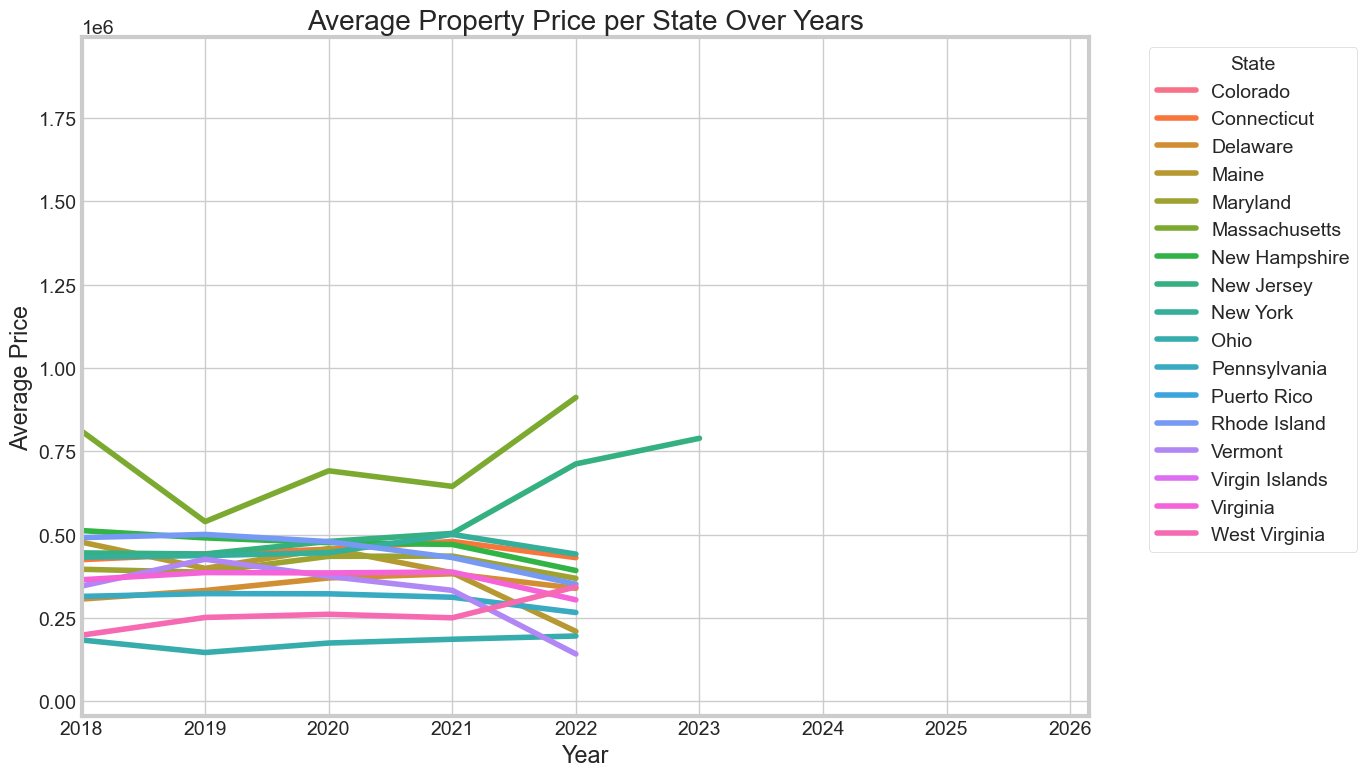

In [20]:
# Filtering the graph so it only shows data from 2018 onward. 
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Pivot data for plotting
pivot_data = annual_state_price_data.reset_index().pivot(index='year', columns='state', values='price')

# Plot data
plt.figure(figsize=(14, 8))  # You can adjust the size as needed
sns.lineplot(data=pivot_data, dashes=False)  # 'dashes=False' makes all lines solid

plt.title('Average Property Price per State Over Years')
plt.ylabel('Average Price')
plt.xlabel('Year')
# Optionally set the x-axis limits if you want to zoom into specific years
plt.xlim(2018)

plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside of the plot
plt.tight_layout()  # Adjusts plot parameters for better layout
plt.show()


## Subsetting, Wrangling and Cleaning Time Series Data

In [37]:
# Create a new DataFrame with only the index and 'price' variable
price_data = cleaned_usa[['price']].copy()

In [38]:
price_data.head()

price
datetime            
2019-06-28  110000.0
2013-10-11  950000.0
2014-06-25  525000.0
2012-10-12  289900.0
1986-11-20  384900.0

In [39]:
price_data.isnull().sum() 

price    0
dtype: int64

In [40]:
# Check for duplicates

dups = price_data.duplicated()
dups.sum()



54755

In [41]:
# Remove duplicate rows in the DataFrame
price_data = price_data.drop_duplicates()

In [42]:
# Check for duplicates again

dups = price_data.duplicated()
dups.sum()

0

In [43]:
decomposition = sm.tsa.seasonal_decompose(price_data, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [44]:
# I'm getting the error above because my time series
#does not have a defined frequency, which is a requirement for performing decomposition
price_data = price_data.resample('Y').median()  # I will set attribute to median


In [46]:
print(price_data.index.freq)

<YearEnd: month=12>


In [47]:
price_data.isnull().sum()

price    14
dtype: int64

In [48]:
# Need to fill the missing data with median 'price'
median_price = price_data['price'].median()
price_data['price'] = price_data['price'].fillna(median_price)



In [49]:
price_data.isnull().sum() 

price    0
dtype: int64

In [50]:
# Rerun the decomposition
decomposition = sm.tsa.seasonal_decompose(price_data, model='additive')

In [51]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

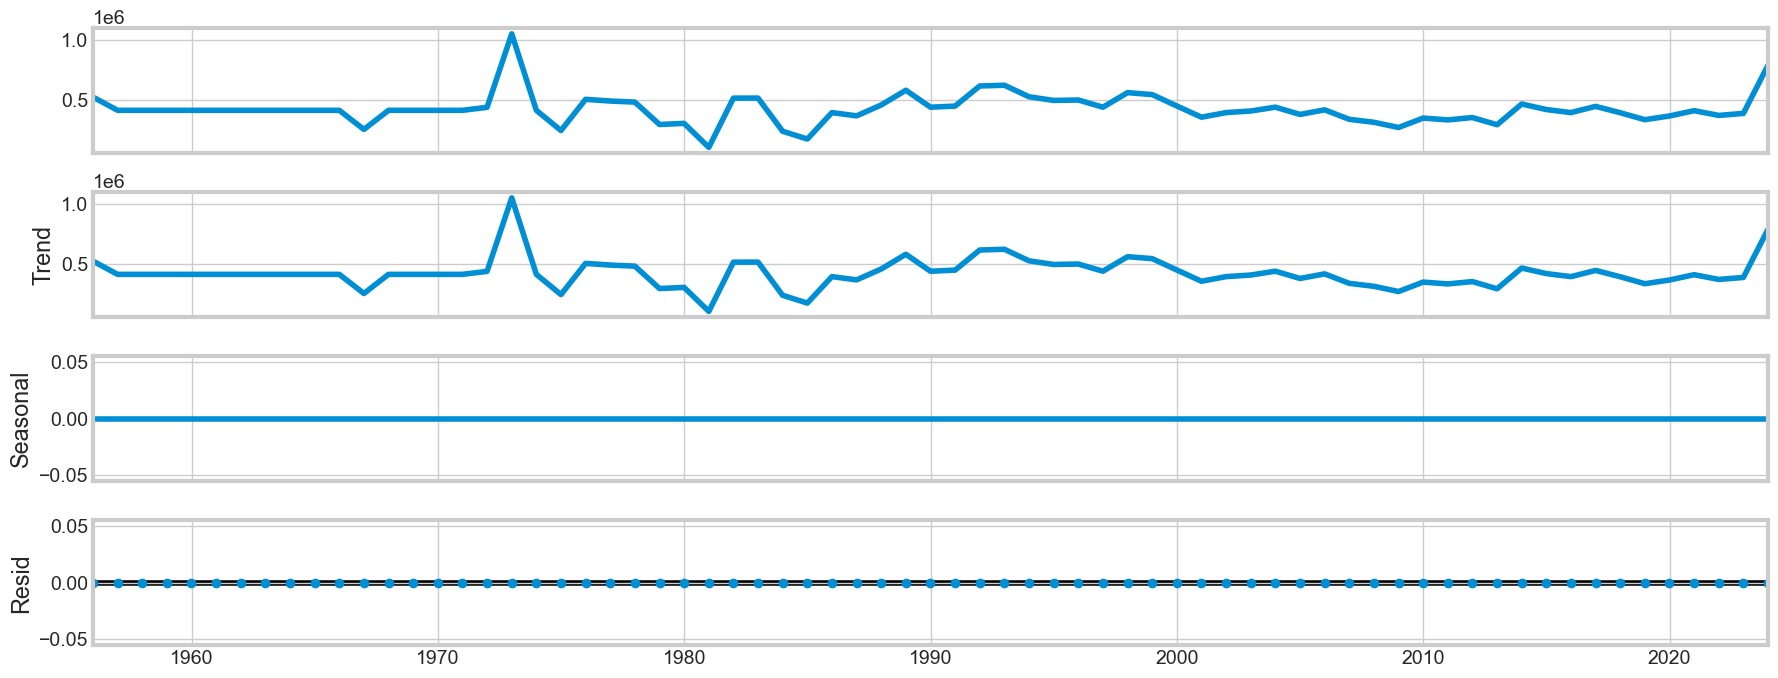

In [52]:
# Plot the separate components

decomposition.plot()
plt.show()

### Based on the initial look of the graphs, we can see the data may be stationary. 

# Test for Stationarity

In [53]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(price_data['price'])

Dickey-Fuller Stationarity test:
Test Statistic                -6.075790e+00
p-value                        1.122469e-07
Number of Lags Used            0.000000e+00
Number of Observations Used    6.800000e+01
Critical Value (1%)           -3.530399e+00
Critical Value (5%)           -2.905087e+00
Critical Value (10%)          -2.590001e+00
dtype: float64


## The Test Statistic is significantly lower than the Critical Values and our p-value is less than 0.05. We can conclude our data is stationary. 

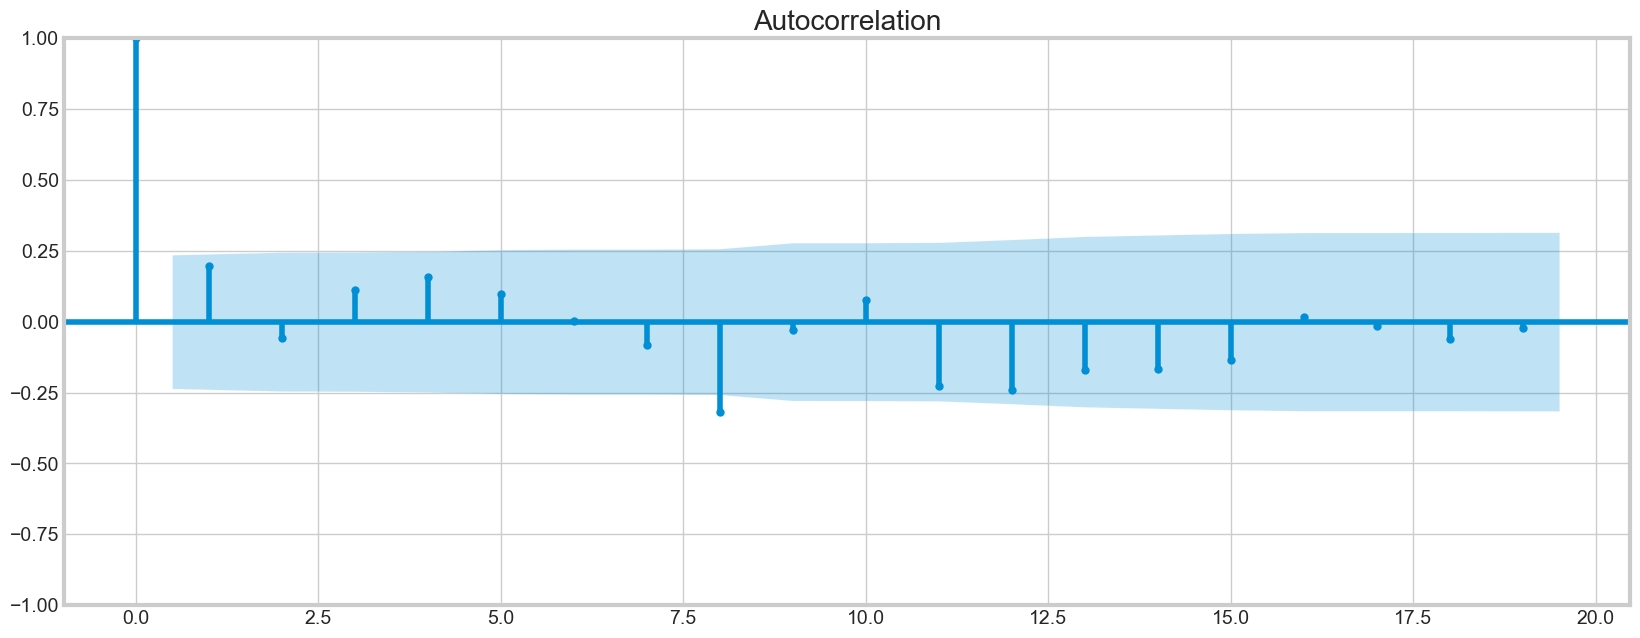

In [54]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(price_data)
plt.show()